In [2]:
import pandas as pd
import re

In [66]:
get_table = pd.read_csv('./sirekap_scraping.csv')
get_table.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d3ea0b9c-3d6d-4cb6-a45e-5d179b48dbc8,Buter Grafika 23,https://play-lh.googleusercontent.com/a-/ALV-U...,fitur dari sirekap belum sepenuhnya mutakhir p...,1,220,2.48,2024-02-20 17:42:18,NaN,NaN,2.48
1,340f357e-24b7-4ee7-8dd2-1666eb2547dd,enesis jember,https://play-lh.googleusercontent.com/a-/ALV-U...,"Kamera jelek tidak bisa HD kayak kamera jadul,...",1,18,2.48,2024-02-17 21:53:11,NaN,NaN,2.48
2,1ffad6f5-7bf1-4ae9-9127-50e46f8b64bd,Jaja Jamaluddin,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplikasi menyusahkan, bukan mempermudah pekerj...",1,3,2.48,2024-02-20 01:46:12,NaN,NaN,2.48
3,cc558764-a675-4508-94b6-e96ca948c271,Irma Yanti,https://play-lh.googleusercontent.com/a/ACg8oc...,"Benar² buruk, aplikasi dipake se Indonesia, se...",1,22,2.48,2024-02-15 23:20:03,NaN,NaN,2.48
4,60b88f78-7002-4fbd-ab59-2b5512d56f01,Siti Fadilah,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplikasinya belum siap buat publish, masih ban...",3,39,2.48,2024-02-19 07:35:40,NaN,NaN,2.48


In [67]:
get_table = get_table[['userName', 'content', 'score']]
get_table

,userName,content,score
0,Buter Grafika 23,fitur dari sirekap belum sepenuhnya mutakhir p...,1
1,enesis jember,"Kamera jelek tidak bisa HD kayak kamera jadul,...",1
2,Jaja Jamaluddin,"Aplikasi menyusahkan, bukan mempermudah pekerj...",1
3,Irma Yanti,"Benar² buruk, aplikasi dipake se Indonesia, se...",1
4,Siti Fadilah,"Aplikasinya belum siap buat publish, masih ban...",3
...,...,...,...
194,Musafa Faozi,"Blas gagal bikin kepala pusing, mana yang capr...",1
195,Merlina,"Aplikasi cacat,aplikasi prematur,banyak bug ,b...",1
196,Dama Yanti,"Tolong diperbaiki, aplikasi belum siap digunak...",1
197,Kristinaalnitania Niken,Apk nya kenapa ya hasilnya eror terus gak bisa...,2


# 1. Cleaning Data

In [68]:
get_table = get_table.drop_duplicates(subset= 'content')
get_table.duplicated().sum()

0

In [69]:
get_table = get_table.dropna()
get_table.isnull().sum()

userName    0
content     0
score       0
dtype: int64

In [70]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', string)

def clean_comment(text): 
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) # mention
    text = re.sub(r'#\w+', '', text) # hastag
    text = re.sub(r'https?://\S+', '', text) # link url
    text = re.sub(r'[A-Za-z0-9 ]', '', text) # alphanumeric
    text = re.sub(r'\s+', ' ', text).strip() # spacing
    text = remove_emoji(text)
    
    return text

get_table['content'] = get_table['content'].apply(remove_emoji)
get_table['content'] = get_table['content'].str.lower()
get_table

,userName,content,score
0,Buter Grafika 23,fitur dari sirekap belum sepenuhnya mutakhir p...,1
1,enesis jember,"kamera jelek tidak bisa hd kayak kamera jadul,...",1
2,Jaja Jamaluddin,"aplikasi menyusahkan, bukan mempermudah pekerj...",1
3,Irma Yanti,"benar² buruk, aplikasi dipake se indonesia, se...",1
4,Siti Fadilah,"aplikasinya belum siap buat publish, masih ban...",3
...,...,...,...
194,Musafa Faozi,"blas gagal bikin kepala pusing, mana yang capr...",1
195,Merlina,"aplikasi cacat,aplikasi prematur,banyak bug ,b...",1
196,Dama Yanti,"tolong diperbaiki, aplikasi belum siap digunak...",1
197,Kristinaalnitania Niken,apk nya kenapa ya hasilnya eror terus gak bisa...,2


# 2. Preproccesing Data
- Normalisasi
- Stopword
- Tokenize
- Stemming

In [71]:
# normalisasi
norm_words = {
    ' yg ': ' yang ', 
    ' jadul ': ' jaman dulu ', 
    ' udh ': ' sudah ', 
    ' benar2': ' benar-benar ', 
    ' apa2': ' apa-apa', 
    ' sy ': ' saya ', 
    ' kelen ': ' kalian ',
    ' km ': ' kamu ',
    ' gak ': ' tidak ',
    ' gk ': ' tidak ',
    ' ga ': ' tidak ',
    ' g ': ' tidak ',
    ' ngga ': ' tidak ',
    ' egga ': ' tidak ',
    ' eggak ': ' tidak ',
    ' nggak ': ' tidak ',
    ' enggak ': ' tidak ',
    ' yo ': ' ya',
    ' hp ': ' handphone ',
    ' karna': ' karena ',
    ' apk ': ' aplikasi ',
    ' error2 ': ' error-error ',
    ' dgn ': ' dengan ',
    ' dlm ': ' dalam ',
    ' tdk ': ' tidak ',
    ' jgn': ' jangan ',
    ' u ': ' untuk ',
    ' jauh2 ': ' jauh-jauh ',
    ' ty ': ' terima kasih ',
    ' tq ': ' terima kasih',
    ' skrng ': ' sekarang ',
    ' skarang ': ' sekarang ',
    ' sdh ': ' sudah ',
    ' gabisa ': ' tidak bisa ',
    ' aja ': ' saja ',
    ' maksut ': ' maksud ',
    ' gais ': ' guys ',
    ' blm ': ' belum ',
    ' knapa ': ' kenapa ',
    ' knp ': ' kenapa ',
    ' tp ': ' tapi ',
    ' tpi': ' tapi ',
    ' jg ': ' juga ',
    ' bgt ': ' banget ',
    ' benar2 ': ' benar-benar '
}

def normalisasi(text):
    for i in norm_words:
        text = text.replace(i, norm_words[i])
    return text

get_table['content'] = get_table['content'].apply(lambda x: normalisasi(x))

get_table

,userName,content,score
0,Buter Grafika 23,fitur dari sirekap belum sepenuhnya mutakhir p...,1
1,enesis jember,"kamera jelek tidak bisa hd kayak kamera jadul,...",1
2,Jaja Jamaluddin,"aplikasi menyusahkan, bukan mempermudah pekerj...",1
3,Irma Yanti,"benar² buruk, aplikasi dipake se indonesia, se...",1
4,Siti Fadilah,"aplikasinya belum siap buat publish, masih ban...",3
...,...,...,...
194,Musafa Faozi,"blas gagal bikin kepala pusing, mana yang capr...",1
195,Merlina,"aplikasi cacat,aplikasi prematur,banyak bug ,b...",1
196,Dama Yanti,"tolong diperbaiki, aplikasi belum siap digunak...",1
197,Kristinaalnitania Niken,apk nya kenapa ya hasilnya eror terus tidak bi...,2


In [72]:
# stopwords
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

stop_words = StopWordRemoverFactory().get_stop_words()

new_arr = ArrayDictionary(stop_words)
stop_words_remover = StopWordRemover(new_arr)

def stopwords(text):
    text = stop_words_remover.remove(text)
    return text

get_table['content'] = get_table['content'].apply(lambda x: stopwords(x))
get_table.head()

Index(['userName', 'content', 'score'], dtype='object')

In [73]:
# tokenize
tokenized = get_table['content'].apply(lambda x: x.split())
tokenized

0      [fitur, sirekap, sepenuhnya, mutakhir, perlu, ...
1      [kamera, jelek, hd, kayak, kamera, jadul,, men...
2      [aplikasi, menyusahkan,, bukan, mempermudah, p...
3      [benar², buruk,, aplikasi, dipake, se, indones...
4      [aplikasinya, siap, buat, publish,, banyak, ha...
                             ...                        
194    [blas, gagal, bikin, kepala, pusing,, mana, ca...
195    [aplikasi, cacat,aplikasi, prematur,banyak, bu...
196    [diperbaiki,, aplikasi, siap, digunakan, suruh...
197    [apk, nya, ya, hasilnya, eror, terus, bisa, in...
198    [aplikasinya, crush..., jangankan, mau, login,...
Name: content, Length: 199, dtype: object

In [132]:
# stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming_words(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    result = []
    for text in text_cleaning:
        stem = stemmer.stem(text)
        result.append(stem)
    data_clean = []
    data_clean = ' '.join(result)
    return data_clean

tokenized = tokenized.apply(stemming_words)
tokenized.to_csv('./result_tokenize.csv', index=False)


# 3. Translate Data

In [57]:
result_stemming = pd.read_csv('./result_tokenize.csv', encoding='latin1')
result_stemming

,content
0,fitur sirekap sepenuh mutakhir perlu tingkat k...
1,kamera jelek hd kayak kamera jadul deteksi ang...
2,aplikasi susah bukan mudah kerja harus foto be...
3,benar buruk aplikasi dipake se indonesia kalo ...
4,aplikasi siap buat publish banyak harus baik 1...
...,...
194,blas gagal bikin kepala pusing mana capres caw...
195,aplikasi cacat aplikasi prematur banyak bug ba...
196,baik aplikasi siap guna suruh pakai mana pps s...
197,apk nya ya hasil eror terus bisa inisial notif...


In [85]:
from deep_translator import GoogleTranslator

def convert_lang(text):
    translator = GoogleTranslator(source='auto', target='en')
    translation = translator.translate(text)
    return translation

result_stemming['content_en'] = result_stemming['content'].apply(convert_lang)
result_stemming.to_csv('./result_convert_lang_en.csv', index=False)

# 4. Visualisasi Data

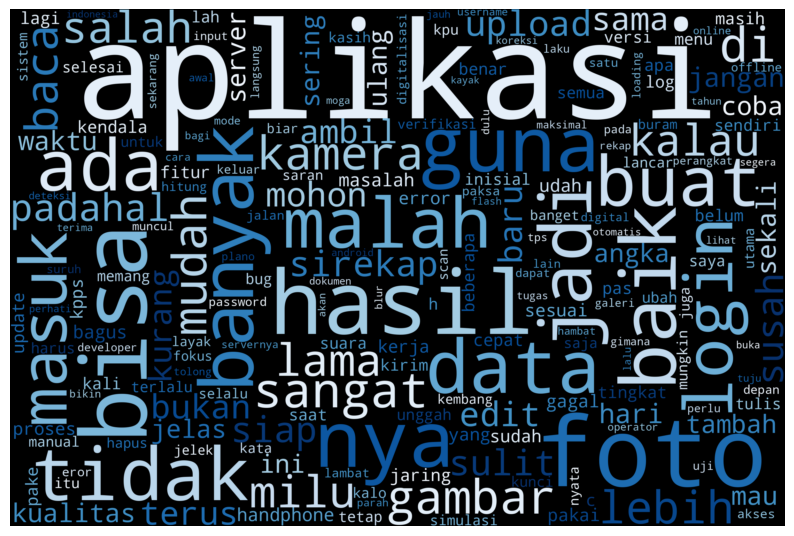

,content
0,fitur sirekap sepenuh mutakhir perlu tingkat k...
1,kamera jelek hd kayak kamera jadul deteksi ang...
2,aplikasi susah bukan mudah kerja harus foto be...
3,benar buruk aplikasi dipake se indonesia kalo ...
4,aplikasi siap buat publish banyak harus baik 1...
...,...
194,blas gagal bikin kepala pusing mana capres caw...
195,aplikasi cacat aplikasi prematur banyak bug ba...
196,baik aplikasi siap guna suruh pakai mana pps s...
197,apk nya ya hasil eror terus bisa inisial notif...


In [77]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join([content for content in result_stemming['content']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

# 5. Labelling Data

In [104]:
data = pd.read_csv('./result_convert_lang_en - backup.csv', index_col=0)
data['content_en']

content
fitur sirekap sepenuh mutakhir perlu tingkat kembali jangan gara-gara aplikasi tugas kpps salah perlu tingkat  hasil scan edit 2x al hasil ada revisi tidk bisa ubah daftar hadir ada opsi dpt dpk dptb proses upload relatif lama server siap tampung mode offline banyak blank baca server padahal aplikasi sukses kirim mohon perhati depan                                                                                       The sirekap feature is fully up to date, needs...
kamera jelek hd kayak kamera jadul deteksi angka aplikasi nya susah pakai lot tingkat dewa inti kamera patut guna mungkin bisa di revisi milu lanjut cahaya pakai sokle baru bisa baca aplikasi nya tolol                                                                                                                                                                                                                            bad HD camera, like an old school camera, dete...
aplikasi susah bukan mudah kerja harus foto bentuk

In [99]:
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/kyousuke/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [105]:
data_reviews = list(data['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_reviews):
    analysis = TextBlob(review)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil analisis data: \nPositif = {total_positif}\nNegatif = {total_negatif}\nNetral = {total_netral}')
print(f'total data: {total}')

Hasil analisis data: 
Positif = 116
Negatif = 77
Netral = 6
total data: 199


In [106]:
data['label'] = status
data

,content_en,label
content,,
fitur sirekap sepenuh mutakhir perlu tingkat kembali jangan gara-gara aplikasi tugas kpps salah perlu tingkat hasil scan edit 2x al hasil ada revisi tidk bisa ubah daftar hadir ada opsi dpt dpk dptb proses upload relatif lama server siap tampung mode offline banyak blank baca server padahal aplikasi sukses kirim mohon perhati depan,"The sirekap feature is fully up to date, needs...",Positif
kamera jelek hd kayak kamera jadul deteksi angka aplikasi nya susah pakai lot tingkat dewa inti kamera patut guna mungkin bisa di revisi milu lanjut cahaya pakai sokle baru bisa baca aplikasi nya tolol,"bad HD camera, like an old school camera, dete...",Negatif
aplikasi susah bukan mudah kerja harus foto bentuk foto apa yang penting jelas baca betul hasil plano bawah inputan manual hasil biar mudah bukan ini foto hasil,"the application is difficult, not easy, the wo...",Positif
benar buruk aplikasi dipake se indonesia kalo memang eror ini terus mending usah bikin aplikasi sirekap kata buat mudah hasil sulit aplikasi hampir minggu ganti versi,It's really bad that the application is used t...,Negatif
aplikasi siap buat publish banyak harus baik 1 2 anggota sirekap 1 tps data sudah upload disirekap 1 muncul sirekap 2 fixing 2 akses edit data pemberitahuan c salin sama data sudah diupload 3 scan sesuai auto clear tiap inputan 4 upload hadir dpt tambah halamn lihat terlalu bawah 5 upload data saksi hanya ada tiap jenis suara agar tidak dobel,"the application is ready to publish, lots of i...",Positif
...,...,...
blas gagal bikin kepala pusing mana capres cawapres bisa edit hasil periksa lebih dpt lagi buat apa pake aplikasi sirekap kalo hasil ngawur beri nilai 0 05 100 saran baik jadi jangan kaya gin lagi liat banget kalo server aplikasi buat indo jelek padahal aplikasi alat bantu negara masa segitunya hehe,"blas failed, it makes your head spin, where ca...",Positif
aplikasi cacat aplikasi prematur banyak bug banyak error aplikasi sampah pernah pake semenjak pake handphone android kpu pake nyalahin kpps banyak aplikasi nya cacat upload satu foto susah nya mintak ampun apa pas milu 67 mau upload 1 foto telah jam jam baru id upload kadang bisa sama sekali apa mungkin dana buat aplikasi korupsi bisa aplikasi nya cacat sprematur ini hello aplikasi buat negara emang cacat aplikasi,"the application is defective, the application ...",Negatif
baik aplikasi siap guna suruh pakai mana pps suruh coba terus update si rekap inti hasil sudh selesai peduli si rekap bisa terus cape coba2 terus wassalam,"OK, the application is ready to use, tell me w...",Positif


# 6. Klasifikasi Sentimen

In [114]:
dataset = data
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [146]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if(n[1] == 'Positif'):
        set_positif.append(n)
    elif(n[1] == 'Negatif'):
        set_negatif.append(n)
    else:
        set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral
train_set = []

for n in train:
    train_set.append(n)

print(len(train))

99


In [148]:
from textblob.classifiers import NaiveBayesClassifier

cl = NaiveBayesClassifier(train_set)
print(f'precision: {cl.accuracy(dataset)}')

precision: 0.7788944723618091
